<a href="https://colab.research.google.com/github/Ahhhextd/PROJECT_AHHHEXTD/blob/main/TUGAS_BESAR_CEPET_SELESAI_DATA_ANALITIK_KALO_JURNAL_BISMILLAH_AJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
data = pd.read_csv('/content/Data_Realisasi_Investasi_Triwulan_I_Tahun_2025.csv')
print(data.dtypes)

periode                    object
status_penanaman_modal     object
regional                   object
negara                     object
sektor_utama               object
nama_sektor                object
deskripsi_kbli_2digit      object
provinsi                   object
kabupaten_kota             object
jawa_luar_jawa             object
pulau                      object
investasi_rp_juta         float64
investasi_us_ribu         float64
tki                         int64
dtype: object


In [ ]:
data.head ()

,periode,status_penanaman_modal,regional,negara,sektor_utama,nama_sektor,deskripsi_kbli_2digit,provinsi,kabupaten_kota,jawa_luar_jawa,pulau,investasi_rp_juta,investasi_us_ribu,tki
0,2025 - Triwulan 1,PMA,Afrika,Afrika Selatan,Sektor Primer,Pertambangan,(09-2020) Aktivitas Jasa Penunjang Pertambangan,Daerah Khusus Ibukota Jakarta,Kota Adm. Jakarta Selatan,Jawa,Jawa,10217.340106,638.583757,18
1,2025 - Triwulan 1,PMA,Afrika,Afrika Selatan,Sektor Sekunder,Industri Kertas dan Percetakan,(58-2020) Aktivitas Penerbitan,Bali,Kabupaten Badung,Luar Jawa,Bali dan Nusa Tenggara,0.000000,0.000000,0
2,2025 - Triwulan 1,PMA,Afrika,Afrika Selatan,Sektor Tersier,Hotel dan Restoran,(55-2020) Penyediaan Akomodasi,Bali,Kabupaten Badung,Luar Jawa,Bali dan Nusa Tenggara,5.000000,0.312500,0
3,2025 - Triwulan 1,PMA,Afrika,Afrika Selatan,Sektor Tersier,Hotel dan Restoran,(55-2020) Penyediaan Akomodasi,Nusa Tenggara Barat,Kabupaten Dompu,Luar Jawa,Bali dan Nusa Tenggara,0.000000,0.000000,0
4,2025 - Triwulan 1,PMA,Afrika,Afrika Selatan,Sektor Tersier,Hotel dan Restoran,(55-2020) Penyediaan Akomodasi,Nusa Tenggara Barat,Kabupaten Lombok Tengah,Luar Jawa,Bali dan Nusa Tenggara,335.000000,20.937500,0


In [ ]:
data_filtered = data[['regional', 'sektor_utama', 'nama_sektor', 'provinsi', 'pulau', 'investasi_rp_juta', 'deskripsi_kbli_2digit']]
data_filtered.head (11)


,regional,sektor_utama,nama_sektor,provinsi,pulau,investasi_rp_juta,deskripsi_kbli_2digit
0,Afrika,Sektor Primer,Pertambangan,Daerah Khusus Ibukota Jakarta,Jawa,10217.340106,(09-2020) Aktivitas Jasa Penunjang Pertambangan
1,Afrika,Sektor Sekunder,Industri Kertas dan Percetakan,Bali,Bali dan Nusa Tenggara,0.000000,(58-2020) Aktivitas Penerbitan
2,Afrika,Sektor Tersier,Hotel dan Restoran,Bali,Bali dan Nusa Tenggara,5.000000,(55-2020) Penyediaan Akomodasi
3,Afrika,Sektor Tersier,Hotel dan Restoran,Nusa Tenggara Barat,Bali dan Nusa Tenggara,0.000000,(55-2020) Penyediaan Akomodasi
4,Afrika,Sektor Tersier,Hotel dan Restoran,Nusa Tenggara Barat,Bali dan Nusa Tenggara,335.000000,(55-2020) Penyediaan Akomodasi
5,Afrika,Sektor Tersier,Hotel dan Restoran,Nusa Tenggara Barat,Bali dan Nusa Tenggara,738.567408,(55-2020) Penyediaan Akomodasi
6,Afrika,Sektor Tersier,Hotel dan Restoran,Sumatera Barat,Sumatera,28.000000,(55-2020) Penyediaan Akomodasi
7,Afrika,Sektor Tersier,Hotel dan Restoran,Sumatera Utara,Sumatera,152.000000,(55-2020) Penyediaan Akomodasi
8,Afrika,Sektor Tersier,Hotel dan Restoran,Bali,Bali dan Nusa Tenggara,12.500000,(56-2020) Penyediaan Makanan Dan Minuman
9,Afrika,Sektor Tersier,Hotel dan Restoran,Bali,Bali dan Nusa Tenggara,0.000000,(56-2020) Penyediaan Makanan Dan Minuman


In [ ]:
label_encoder = LabelEncoder()

categorical_columns = ['regional', 'sektor_utama', 'nama_sektor', 'provinsi', 'pulau', 'deskripsi_kbli_2digit']

for col in categorical_columns:
    data_filtered[col] = label_encoder.fit_transform(data_filtered[col])


<ipython-input-37-d0f8e0328e6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[col] = label_encoder.fit_transform(data_filtered[col])
<ipython-input-37-d0f8e0328e6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[col] = label_encoder.fit_transform(data_filtered[col])
<ipython-input-37-d0f8e0328e6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered[['investasi_rp_juta']])

In [ ]:
data_scaled = np.column_stack([data_filtered.drop(columns=['investasi_rp_juta']).values, data_scaled])


In [ ]:
distortions = []
K_range = range(1, 11)  # Cek jumlah cluster antara 1 hingga 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])


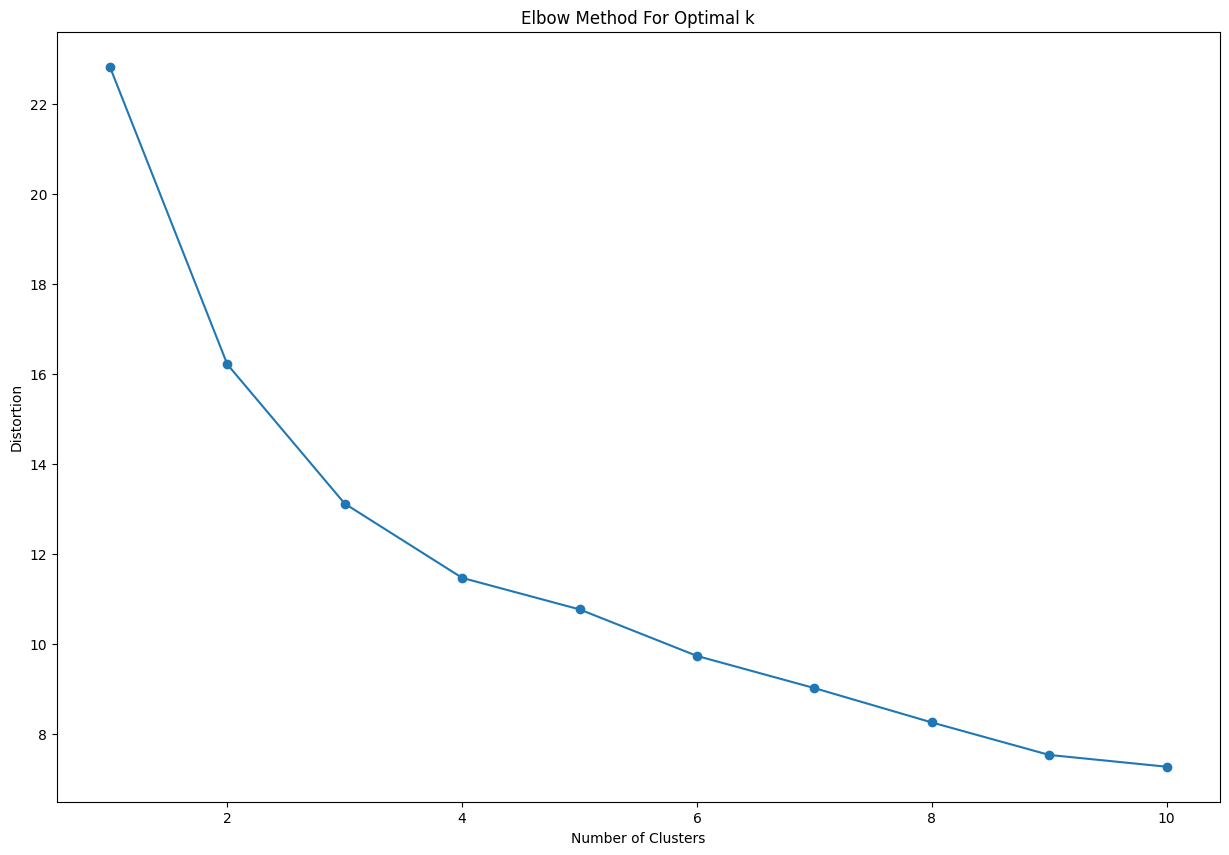

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_filtered['kmeans_cluster'] = kmeans.fit_predict(data_scaled)


<ipython-input-44-70a48336479a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['kmeans_cluster'] = kmeans.fit_predict(data_scaled)


In [ ]:
silhouette_avg = silhouette_score(data_scaled, data_filtered['kmeans_cluster'])
print(f'Silhouette Coefficient for KMeans: {silhouette_avg}')

Silhouette Coefficient for KMeans: 0.38960642267413026


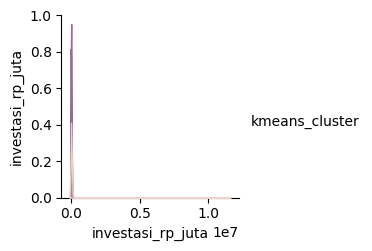

In [ ]:
sns.pairplot(data_filtered, hue='kmeans_cluster', vars=['investasi_rp_juta'])
plt.show()

In [ ]:
ground_truth = np.random.randint(0, 3, size=len(data_filtered))  # Contoh ground truth
ari_kmeans = adjusted_rand_score(ground_truth, data_filtered['kmeans_cluster'])
print(f'Adjusted Rand Index for KMeans: {ari_kmeans}')

Adjusted Rand Index for KMeans: -1.3967827285169006e-05


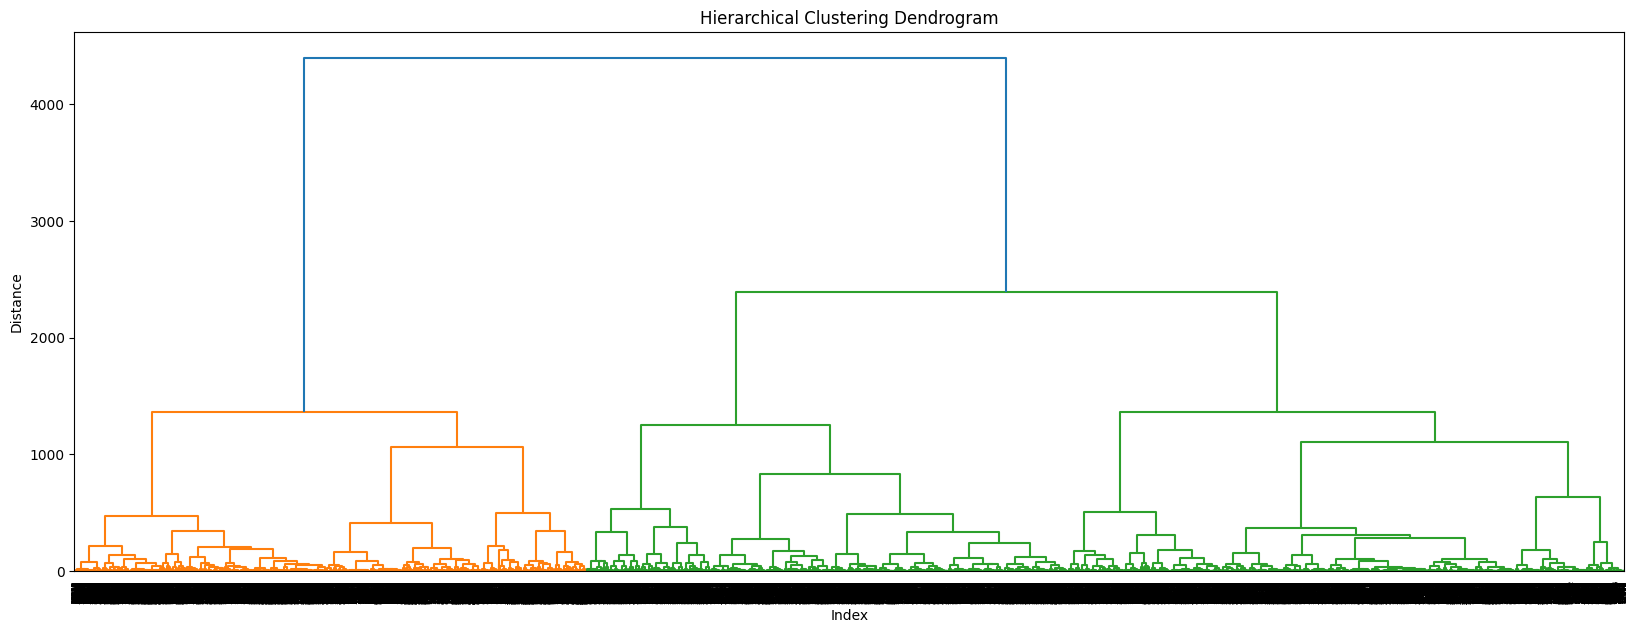

<ipython-input-49-d47edec740f1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['hierarchical_cluster'] = fcluster(Z, max_d, criterion='distance')


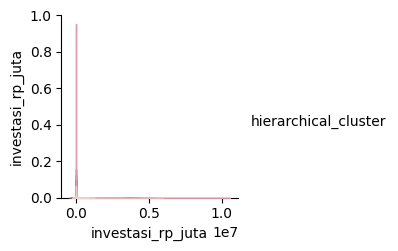

Silhouette Coefficient for Hierarchical Clustering: 0.5015447563117027
Adjusted Rand Index for Hierarchical Clustering: -4.0061653598444305e-07


In [ ]:
# Hierarchical Clustering dengan Linkage Method 'ward'
Z = linkage(data_scaled, method='ward')

# Dendrogram untuk visualisasi
plt.figure(figsize=(20, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Menentukan cluster berdasarkan distance threshold
max_d = 15  # Sesuaikan threshold untuk memotong dendrogram
data_filtered['hierarchical_cluster'] = fcluster(Z, max_d, criterion='distance')

# Menampilkan hasil clustering Hierarchical
sns.pairplot(data_filtered, hue='hierarchical_cluster', vars=['investasi_rp_juta'])
plt.show()

# Menghitung Silhouette Coefficient untuk evaluasi clustering Hierarchical
silhouette_avg_hierarchical = silhouette_score(data_scaled, data_filtered['hierarchical_cluster'])
print(f'Silhouette Coefficient for Hierarchical Clustering: {silhouette_avg_hierarchical}')

# Adjusted Rand Index untuk Hierarchical Clustering
ari_hierarchical = adjusted_rand_score(ground_truth, data_filtered['hierarchical_cluster'])
print(f'Adjusted Rand Index for Hierarchical Clustering: {ari_hierarchical}')

In [ ]:
data_clean = data[['regional', 'sektor_utama', 'nama_sektor', 'provinsi', 'pulau', 'investasi_rp_juta', 'deskripsi_kbli_2digit']]


In [ ]:
label_encoder = LabelEncoder()

data_clean['regional'] = label_encoder.fit_transform(data_clean['regional'])
data_clean['sektor_utama'] = label_encoder.fit_transform(data_clean['sektor_utama'])
data_clean['nama_sektor'] = label_encoder.fit_transform(data_clean['nama_sektor'])
data_clean['provinsi'] = label_encoder.fit_transform(data_clean['provinsi'])
data_clean['pulau'] = label_encoder.fit_transform(data_clean['pulau'])
data_clean['deskripsi_kbli_2digit'] = label_encoder.fit_transform(data_clean['deskripsi_kbli_2digit'])

<ipython-input-53-0d0650ea373d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['regional'] = label_encoder.fit_transform(data_clean['regional'])
<ipython-input-53-0d0650ea373d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sektor_utama'] = label_encoder.fit_transform(data_clean['sektor_utama'])
<ipython-input-53-0d0650ea373d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [ ]:
X = data_clean[['regional', 'sektor_utama', 'nama_sektor', 'provinsi', 'pulau', 'investasi_rp_juta', 'deskripsi_kbli_2digit']]


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [ ]:
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

Silhouette Score for K-Means: 0.9841043373120892


In [ ]:
# Menghitung Adjusted Rand Index (dengan label asli untuk referensi)
# Asumsi kita tidak punya label asli, gunakan label prediksi untuk analisis dalam kasus ini
ari_kmeans = adjusted_rand_score(kmeans_labels, kmeans_labels)  # Misalnya, jika kita tidak punya label ground truth
print(f"Adjusted Rand Index for K-Means: {ari_kmeans}")

Adjusted Rand Index for K-Means: 1.0


In [ ]:
import scipy.cluster.hierarchy as sch

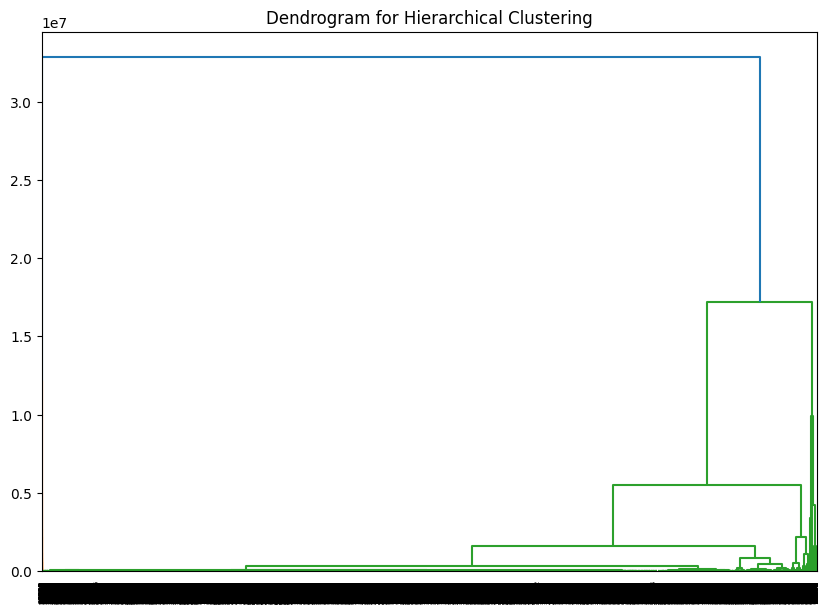

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [ ]:
hierarchical = sch.fcluster(sch.linkage(X, method='ward'), 3, criterion='maxclust')


In [ ]:
silhouette_hierarchical = silhouette_score(X, hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")

Silhouette Score for Hierarchical Clustering: 0.9777067265254378


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
euclidean_distance = euclidean_distances(X)
print(f"Euclidean Distance matrix: {euclidean_distance[:5, :5]}")

Euclidean Distance matrix: [[0.00000000e+00 1.02174397e+04 1.02124411e+04 1.02174528e+04
  9.88245663e+03]
 [1.02174397e+04 0.00000000e+00 8.12403840e+00 2.10000000e+01
  3.35657564e+02]
 [1.02124411e+04 8.12403840e+00 0.00000000e+00 2.06155281e+01
  3.30605505e+02]
 [1.02174528e+04 2.10000000e+01 2.06155281e+01 0.00000000e+00
  3.35000000e+02]
 [9.88245663e+03 3.35657564e+02 3.30605505e+02 3.35000000e+02
  0.00000000e+00]]


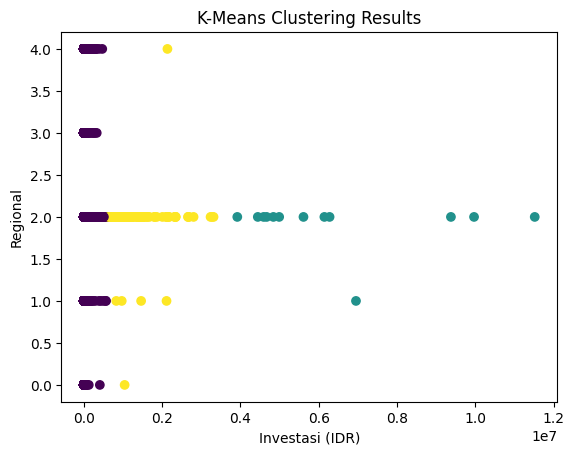

In [ ]:
plt.scatter(X['investasi_rp_juta'], X['regional'], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Investasi (IDR)')
plt.ylabel('Regional')
plt.show()

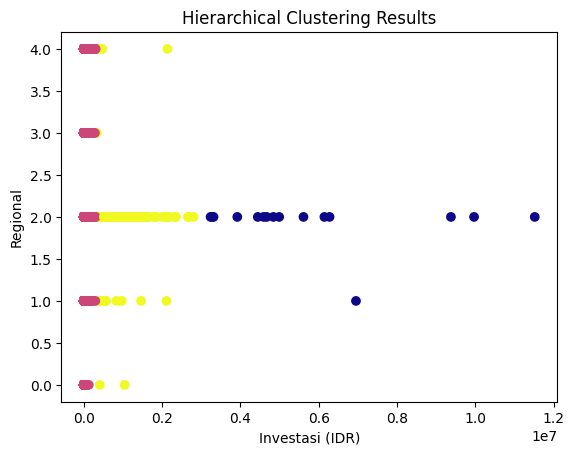

In [ ]:
plt.scatter(X['investasi_rp_juta'], X['regional'], c=hierarchical, cmap='plasma')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Investasi (IDR)')
plt.ylabel('Regional')
plt.show()